In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [24]:
N=100
bounds = np.zeros((N,3))
for x in range(N): #Get the new bounds, as well as a uniform distributed variable in these bounds
    U1=rand.uniform(38,44)
    U2=rand.uniform(38,44)
    U3=rand.uniform(min(U1,U2), max(U1,U2))
    U = [min(U1,U2), max(U1,U2),U3]
    bounds[x,:] = U

In [40]:
precision = 100
6*precision+1
costs = np.zeros((6*precision+1,N))
x=np.linspace(38,44,6*precision+1)
y=np.zeros((6*precision+1,N))
for j in list(range(0,N)):
    for i in list(range(0,len(x))): #For every value of x, get the optimal value of y
        l=bounds[:,0]-x[i]          
        u=bounds[:,1]-x[i]
        y[[i,j]]=l+(5/22)*(u-l)     #Calculation of y is the same as in exercise a, but now with distribution Uni(U1-x,U2-x)
        y[y<0]=0                    #y=>0
        d = bounds[:,2]             #We have already calculated the true demand, here denoted by d
        pe = d-x[i]-y[i,j]          #Here, pe is equal to (d-(x+y))^+ as found in slide 3
        pe[pe<0]=0
        ne = x[i]+y[[i,j]]-d        #Here, ne is equal to ((x+y)-d)^+ as found in slide 3
        ne[ne<0]=0
        costs[[i,j]]=0.5*x[i]+0.75*y[[i,j]]+pe+0.1*ne

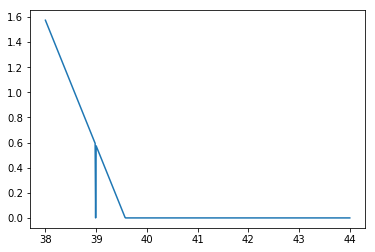

In [42]:
plt.plot(x,y[:,0])
plt.show()

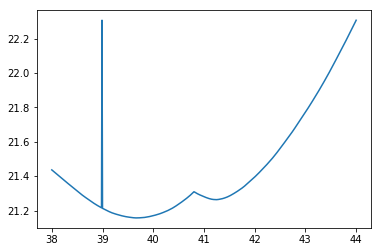

In [43]:
plt.plot(x,costs.sum(axis=1)/100)
plt.show()